### **Notebook for cleaning velocity data**
#### Author: Hannah Nevel

##### Data needs to be in the following format to run this program:
- csv file
- column names above each set of values
- file located on local device

##### Import necessary libraries and data

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


##### Define needed variables

In [194]:
#Change all backslashes in file path to double back slashes
file_location = "C:\\Users\\HannahNevel\\OneDrive - STF Technologies LLC\\Desktop\\DOE RheoSurfR\\Motor Data\\velocity_compression_band_05_12_2023.csv"

#input velocity threshold value, all data values below this point will be removed
velocity_threshold_low = 0.7

#input velocity threshold value, all data values above this point will be removed
velocity_threshold_high = 1.3

#assign as a string the name of the first data column
first_col = 'Motor 1 Arm Velocity (mm/min)'

#assign as a string the name of the time column
time_col = 'Time (ms)'

#assign a new filename for the cleaned data
newfile = 'velocity_compression_05_12_2023_cleaned.csv'

##### Define function to open and import csv or xlsx file, create data frame, and drop missing/null values

In [195]:
def import_csv_file(filepath):
    #file_opening = open(csvfilepath)
    file = pd.read_csv(filepath)

    file_data = pd.DataFrame(file).dropna()
    return file_data

def import_xlsx_file(filepath):
    #file_opening = open(csvfilepath)
    file = pd.read_excel(filepath)

    file_data = pd.DataFrame(file).dropna()
    return file_data

## Change functions depending on the file type
imported_vel_data = import_csv_file(file_location)

#### Clean Data

##### Define function to shift time points to the first velocity value above given threshold 

In [196]:
def shift_time_col(imported_data_frame, vel_thresh_low, vel_col_name, time_col_name):
    index_list = imported_data_frame[imported_data_frame[vel_col_name] < vel_thresh_low].index
    time_value = imported_data_frame[time_col_name][len(index_list)-1]

    #for item in imported_data_frame[time_col_name]:
        #imported_data_frame[time_col_name] = imported_data_frame[time_col_name].replace(item, item-time_value)
   

    #for item in imported_data_frame[time_col_name]:
        #imported_data_frame[time_col_name] = imported_data_frame[time_col_name].replace(item, item/60000)
   

    

##### Define function to remove data points where velocity is less than defined threshold and remove data points where time is 0

In [197]:
def remove_vals(imported_data_frame, vel_thresh_low, vel_thresh_high, first_column, time_column):
    formatted = imported_data_frame.drop(imported_data_frame[imported_data_frame[first_column] < vel_thresh_low].index, inplace=True)
    formatted = imported_data_frame.drop(imported_data_frame[imported_data_frame[first_column] > vel_thresh_high].index, inplace=True)
    formatted = imported_data_frame.drop(imported_data_frame[imported_data_frame[time_column] == 0].index, inplace=True)
    return formatted

##### Run data through cleaning functions, change time column from ms to min, save as new csv and print

In [198]:
#shift_time_col(imported_vel_data, velocity_threshold_low, first_col, time_col)
remove_vals(imported_vel_data, velocity_threshold_low, velocity_threshold_high, first_col, time_col)


imported_vel_data.rename(columns = {'Time (ms)':'Time (min)'}, inplace = True)
imported_vel_data['Time (min)'] = imported_vel_data['Time (min)'].div(60000)
print(imported_vel_data)



       Motor 1 Arm Velocity (mm/min)  Motor 2 Arm Velocity (mm/min)  \
120                            0.721                          0.867   
121                            0.842                          0.973   
122                            0.960                          0.998   
123                            0.960                          0.998   
124                            1.114                          0.971   
...                              ...                            ...   
41048                          0.900                          1.024   
41049                          1.133                          0.977   
41050                          1.084                          0.985   
41051                          0.889                          0.985   
41052                          0.889                          0.985   

       Time (min)  Target Velocity (mm/min)  \
120      0.178233                       1.0   
121      0.180050                       1.0   
122   

##### Save cleaned data to csv file, uncomment after checking data output

In [203]:
#imported_vel_data.to_csv(newfile)

#### Data Visualization

Motor 1 Arm Velocity (mm/min)                1.001320
Motor 2 Arm Velocity (mm/min)                0.999534
Time (min)                                   2.060189
Target Velocity (mm/min)                     1.000000
Positional Difference Between Motors (mm)    0.000613
dtype: float64

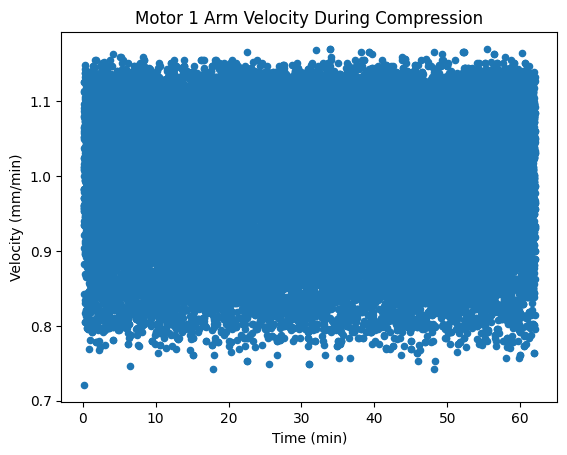

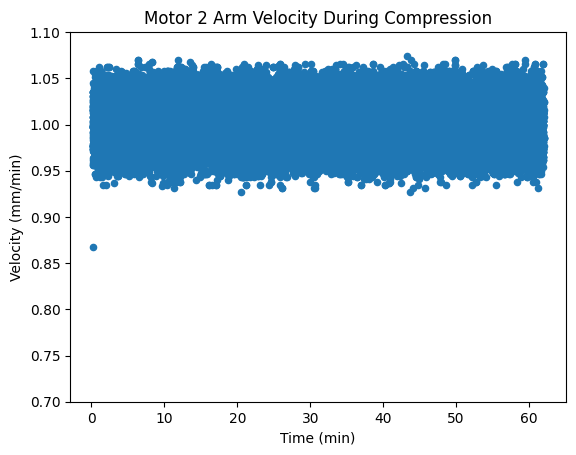

In [204]:
graph1 = imported_vel_data.iloc[:].plot(x='Time (min)', y='Motor 1 Arm Velocity (mm/min)', kind='scatter', title = 'Motor 1 Arm Velocity During Compression')
graph2 = imported_vel_data.iloc[:].plot(x='Time (min)', y='Motor 2 Arm Velocity (mm/min)', kind='scatter', title = 'Motor 2 Arm Velocity During Compression', ylim=(0.7,1.1))
graph1.set_ylabel('Velocity (mm/min)')
graph2.set_ylabel('Velocity (mm/min)')
imported_vel_data.iloc[215:2300].mean()